# Create a DataFrame with the top 100 songs and respective artists by scraping the website Billboard Hot 100. The DataFrame should have 2 columns: song_title, artist.

In [495]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random
from difflib import get_close_matches
import seaborn as sns
import matplotlib.pyplot as plt
from decouple import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
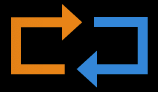

In [497]:
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
print(soup.prettify())

## Fetch song title

In [161]:
song_title = soup.find_all("h3", class_="a-no-trucate")
songs = []
for i in song_title:
    songs.append(i.get_text(strip = True))
songs

['A Bar Song (Tipsy)',
 'Die With A Smile',
 'Birds Of A Feather',
 'Espresso',
 'Lose Control',
 'I Had Some Help',
 'Taste',
 'Beautiful Things',
 'Love Somebody',
 'Sticky',
 'Good Luck, Babe!',
 'Too Sweet',
 "That's So True",
 'St. Chroma',
 'APT.',
 'Please Please Please',
 'Not Like Us',
 'I Am Not Okay',
 'Timeless',
 'Hot To Go!',
 'Darling, I',
 'Lies Lies Lies',
 'Tu Boda',
 'Stargazing',
 'Rah Tah Tah',
 'Sailor Song',
 'Million Dollar Baby',
 "I Love You, I'm Sorry",
 'Like Him',
 'Whatchu Kno About Me',
 'Miles On It',
 'Wildflower',
 'Cowgirls',
 'Bed Chem',
 'The Door',
 'TGIF',
 'Noid',
 'Pink Skies',
 'Thought I Was Dead',
 'You Look Like You Love Me',
 "Ain't No Love In Oklahoma",
 'Austin',
 'I Can Do It With A Broken Heart',
 'Who',
 'High Road',
 'Pink Pony Club',
 "Wind Up Missin' You",
 'Chill Bae',
 'Kehlani',
 'Pour Me A Drink',
 'Dos Dias',
 'Judge Judy',
 'Dancing In The Flames',
 'Light Year (Practice)',
 '25',
 'Help Me',
 "It's Ok I'm Ok",
 'Disease',
 'T

## Fetch artist

In [76]:
artist =soup.find_all("span", class_="a-no-trucate")
artists = []
for i in artist:
    artists.append(i.get_text(strip = True))
artists

['Shaboozey',
 'Lady Gaga & Bruno Mars',
 'Billie Eilish',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Benson Boone',
 'Morgan Wallen',
 'Tyler, The Creator Featuring GloRilla, Sexyy Red & Lil Wayne',
 'Chappell Roan',
 'Hozier',
 'Gracie Abrams',
 'Tyler, The Creator Featuring Daniel Caesar',
 'ROSE & Bruno Mars',
 'Sabrina Carpenter',
 'Kendrick Lamar',
 'Jelly Roll',
 'The Weeknd & Playboi Carti',
 'Chappell Roan',
 'Tyler, The Creator Featuring Teezo Touchdown',
 'Morgan Wallen',
 'Oscar Maydon & Fuerza Regida',
 'Myles Smith',
 'Tyler, The Creator',
 'Gigi Perez',
 'Tommy Richman',
 'Gracie Abrams',
 'Tyler, The Creator Featuring Lola Young',
 'GloRilla & Sexyy Red',
 'Marshmello & Kane Brown',
 'Billie Eilish',
 'Morgan Wallen Featuring ERNEST',
 'Sabrina Carpenter',
 'Teddy Swims',
 'GloRilla',
 'Tyler, The Creator',
 'Zach Bryan',
 'Tyler, The Creator Featuring ScHoolboy Q & Santigold',
 'Ella Langley Featuring Riley Gre

In [300]:
song_title = song_title[:100]
artist = artist[:100]

## Create Dataframe

In [250]:
billboard_df = pd.DataFrame({
        "song_title": songs,
        "artist": artists
    })
billboard_df

song_title                  artist
0   A Bar Song (Tipsy)               Shaboozey
1     Die With A Smile  Lady Gaga & Bruno Mars
2   Birds Of A Feather           Billie Eilish
3             Espresso       Sabrina Carpenter
4         Lose Control             Teddy Swims
..                 ...                     ...
95              Hollon                GloRilla
96         Lonely Road        mgk & Jelly Roll
97           Change Me             BigXthaPlug
98       Him All Along                   Gunna
99              Brokey                   Latto

[100 rows x 2 columns]

Create a Python program that takes a user input, checks if it is present in your scraped DataFrame. If it is, it recommends a random song from the DataFrame. If it’s not, it prints: Sorry, your song is not popular.

In [342]:
billboard_df = pd.DataFrame(billboard_df)
while True:
    user_input = input("Enter a song title: ").strip()
    matches = get_close_matches(user_input, billboard_df["song_title"].values, n=1, cutoff=0.6)

    if matches:
        closest_match = matches[0]
        print(f"Did you mean '{closest_match}'?")
        confirm = input("Type 'yes' to confirm or 'no' to retry: ").strip().lower()
        if confirm == "yes":
            recommended_row = billboard_df.sample()
            recommended_song = recommended_row["song_title"].values[0]
            recommended_artist = recommended_row["artist"].values[0]
            print(f"Great! Here's another recommended song you might like: '{recommended_song}' by artist '{recommended_artist}'")
            break
    else:
        print("Sorry, your song is not popular or the title is incorrect.")
        retry = input("Would you like to try again? Type 'yes' to retry or 'no' to exit: ").strip().lower()
        if retry != "yes":
            break

Enter a song title:  Bar Song


Did you mean 'Sailor Song'?


Type 'yes' to confirm or 'no' to retry:  NO
Enter a song title:  Bar Song


Did you mean 'Sailor Song'?


Type 'yes' to confirm or 'no' to retry:  no
Enter a song title:  Bar Song


Did you mean 'Sailor Song'?


Type 'yes' to confirm or 'no' to retry:  A Bar Song
Enter a song title:  A Bar Song


Did you mean 'A Bar Song (Tipsy)'?


Type 'yes' to confirm or 'no' to retry:  YES


Great! Here's another recommended song you might like: 'Pink Pony Club' by artist 'Chappell Roan'


# Using the Spotipy library, create a DataFrame storing the audio_features of at least 1000 songs. The more diverse your playlist, the better the end result will be!

In [359]:
client_id = config('CLIENT_ID', default='4109b2d9f5014671863bb2df1d1fbdd3')
client_secret = config('CLIENT_SECRET', default='5cb719fae80c4191a9c0b288f51bfe50')

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))

In [434]:
genres = ["pop", "rock", "hip-hop", "classical", "jazz", "indie", "electronic", "blues"]

track_ids = []
for genre in genres:
    offset = 0
    while len(track_ids) < 1000:
        results = sp.search(q=genre, limit=50, market="US", offset=offset)
        items = results['tracks']['items']
        
        if not items:
            break
        
        for track in items:
            track_ids.append(track['id'])
        
        offset += 50
        track_ids = list(set(track_ids))
        print(f"Current count: {len(track_ids)}")

        if len(track_ids) >= 1000:
            break

print(f"Total track_ids collected: {len(track_ids)}")

Current count: 50
Current count: 100
Current count: 150
Current count: 200
Current count: 250
Current count: 300
Current count: 350
Current count: 400
Current count: 450
Current count: 500
Current count: 550
Current count: 600
Current count: 650
Current count: 700
Current count: 750
Current count: 800
Current count: 850
Current count: 900
Current count: 950
Current count: 1000
Total track_ids collected: 1000


In [476]:
audio_features = []
track_data = []

for i in range(0, len(track_ids), 100):
    chunk = track_ids[i:i+100]
    
    features = sp.audio_features(chunk)
    if features:
        audio_features.extend(features)
    
    tracks = sp.tracks(chunk)['tracks']
    for track in tracks:
        if track and 'external_urls' in track:
            artist_id = track['artists'][0]['id'] 
            artist_data = sp.artist(artist_id)    
            genres = artist_data.get('genres', [])
            
            track_data.append({
                "id": track['id'],
                "name": track['name'],
                "url": track['external_urls']['spotify'],
                "genres": genres
            })     

In [478]:
audio_features

[{'danceability': 0.641,
  'energy': 0.734,
  'key': 5,
  'loudness': -7.571,
  'mode': 1,
  'speechiness': 0.0779,
  'acousticness': 0.0139,
  'instrumentalness': 2.26e-06,
  'liveness': 0.062,
  'valence': 0.757,
  'tempo': 92.056,
  'type': 'audio_features',
  'id': '6hvSILCCQT5a0MRcOE36zd',
  'uri': 'spotify:track:6hvSILCCQT5a0MRcOE36zd',
  'track_href': 'https://api.spotify.com/v1/tracks/6hvSILCCQT5a0MRcOE36zd',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6hvSILCCQT5a0MRcOE36zd',
  'duration_ms': 262107,
  'time_signature': 4},
 {'danceability': 0.715,
  'energy': 0.807,
  'key': 0,
  'loudness': -1.824,
  'mode': 1,
  'speechiness': 0.058,
  'acousticness': 0.524,
  'instrumentalness': 0,
  'liveness': 0.0665,
  'valence': 0.889,
  'tempo': 142.085,
  'type': 'audio_features',
  'id': '1zMVxW47BepdWt25N02n3m',
  'uri': 'spotify:track:1zMVxW47BepdWt25N02n3m',
  'track_href': 'https://api.spotify.com/v1/tracks/1zMVxW47BepdWt25N02n3m',
  'analysis_url': 'https://api

In [480]:
track_data

[{'id': '6hvSILCCQT5a0MRcOE36zd',
  'name': 'Footsteps',
  'url': 'https://open.spotify.com/track/6hvSILCCQT5a0MRcOE36zd',
  'genres': ['alternative metal', 'nu metal', 'post-grunge']},
 {'id': '1zMVxW47BepdWt25N02n3m',
  'name': 'Popurrí de Juanga: Caray / Esta Noche Voy a Verla',
  'url': 'https://open.spotify.com/track/1zMVxW47BepdWt25N02n3m',
  'genres': ['banda', 'banda carnavalera']},
 {'id': '2pC3bWbbDBGkn1l6Zpytvc',
  'name': 'popstar',
  'url': 'https://open.spotify.com/track/2pC3bWbbDBGkn1l6Zpytvc',
  'genres': ['dark plugg']},
 {'id': '6S6peBiSpviSHP8zXx9B0L',
  'name': 'Popurri Norteños (En Vivo)',
  'url': 'https://open.spotify.com/track/6S6peBiSpviSHP8zXx9B0L',
  'genres': []},
 {'id': '3fEBhZ37kX3XX0ws1msfd1',
  'name': 'Pop Goes the Weasel',
  'url': 'https://open.spotify.com/track/3fEBhZ37kX3XX0ws1msfd1',
  'genres': []},
 {'id': '5rZlwNFl01HqLWBQGryKSm',
  'name': 'Mood Swings (feat. Lil Tjay)',
  'url': 'https://open.spotify.com/track/5rZlwNFl01HqLWBQGryKSm',
  'genr

In [501]:
audio_features_df = pd.DataFrame(audio_features)
track_details_df = pd.DataFrame(track_data)
audio_features_df = pd.merge(audio_features_df, track_details_df, on="id", how="inner")
audio_features_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.641  0.7340    5    -7.571     1       0.0779      0.013900   
1           0.715  0.8070    0    -1.824     1       0.0580      0.524000   
2           0.532  0.6240    0    -4.743     1       0.0539      0.000018   
3           0.588  0.6970    0    -7.273     1       0.0355      0.415000   
4           0.569  0.0193    0   -26.606     1       0.0617      0.985000   
..            ...     ...  ...       ...   ...          ...           ...   
995         0.769  0.7680    9    -4.709     1       0.2300      0.039100   
996         0.636  0.8280    7    -5.321     1       0.0710      0.000423   
997         0.380  0.9630    7    -4.357     1       0.0935      0.000016   
998         0.608  0.7110    7    -5.564     1       0.0641      0.178000   
999         0.784  0.6660    7    -7.666     1       0.1880      0.487000   

     instrumentalness  liveness  valence  ...            type  \
0            0.000002    0.0620    0.757  ...  audio_features   
1            0.000000    0.0665    0.889  ...  audio_features   
2            0.000000    0.2070    0.100  ...  audio_features   
3            0.000016    0.1150    0.656  ...  audio_features   
4            0.931000    0.1110    0.430  ...  audio_features   
..                ...       ...      ...  ...             ...   
995          0.000000    0.0699    0.797  ...  audio_features   
996          0.206000    0.3740    0.297  ...  audio_features   
997          0.020300    0.3560    0.462  ...  audio_features   
998          0.000000    0.1160    0.521  ...  audio_features   
999          0.000000    0.0920    0.582  ...  audio_features   

                         id                                   uri  \
0    6hvSILCCQT5a0MRcOE36zd  spotify:track:6hvSILCCQT5a0MRcOE36zd   
1    1zMVxW47BepdWt25N02n3m  spotify:track:1zMVxW47BepdWt25N02n3m   
2    2pC3bWbbDBGkn1l6Zpytvc  spotify:track:2pC3bWbbDBGkn1l6Zpytvc   
3    6S6peBiSpviSHP8zXx9B0L  spotify:track:6S6peBiSpviSHP8zXx9B0L   
4    3fEBhZ37kX3XX0ws1msfd1  spotify:track:3fEBhZ37kX3XX0ws1msfd1   
..                      ...                                   ...   
995  39F08AoluLGQ9F1J2bO4Pn  spotify:track:39F08AoluLGQ9F1J2bO4Pn   
996  2WtFbotxC95UD2r1RzE036  spotify:track:2WtFbotxC95UD2r1RzE036   
997  0zaI1vGpqMCAmRoWlgK420  spotify:track:0zaI1vGpqMCAmRoWlgK420   
998  0ffHYlnWNbZQFmxgcqLpvm  spotify:track:0ffHYlnWNbZQFmxgcqLpvm   
999  4aczi9Mnvm9RLMb7ddZh2F  spotify:track:4aczi9Mnvm9RLMb7ddZh2F   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/6hvSILCCQT5a...   
1    https://api.spotify.com/v1/tracks/1zMVxW47Bepd...   
2    https://api.spotify.com/v1/tracks/2pC3bWbbDBGk...   
3    https://api.spotify.com/v1/tracks/6S6peBiSpviS...   
4    https://api.spotify.com/v1/tracks/3fEBhZ37kX3X...   
..                                                 ...   
995  https://api.spotify.com/v1/tracks/39F08AoluLGQ...   
996  https://api.spotify.com/v1/tracks/2WtFbotxC95U...   
997  https://api.spotify.com/v1/tracks/0zaI1vGpqMCA...   
998  https://api.spotify.com/v1/tracks/0ffHYlnWNbZQ...   
999  https://api.spotify.com/v1/tracks/4aczi9Mnvm9R...   

                                          analysis_url duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/6hvS...      262107   
1    https://api.spotify.com/v1/audio-analysis/1zMV...      213373   
2    https://api.spotify.com/v1/audio-analysis/2pC3...      100421   
3    https://api.spotify.com/v1/audio-analysis/6S6p...      303401   
4    https://api.spotify.com/v1/audio-analysis/3fEB...      126295   
..                                                 ...         ...   
995  https://api.spotify.com/v1/audio-analysis/39F0...      152547   
996  https://api.spotify.com/v1/audio-analysis/2WtF...      274098   
997  https://api.spotify.com/v1/audio-analysis/0zaI...      172333   
998  https://api.spotify.com/v1/audio-analysis/0ffH...      360059   
999

In [489]:
audio_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'name', 'url', 'genres'],
      dtype='object')

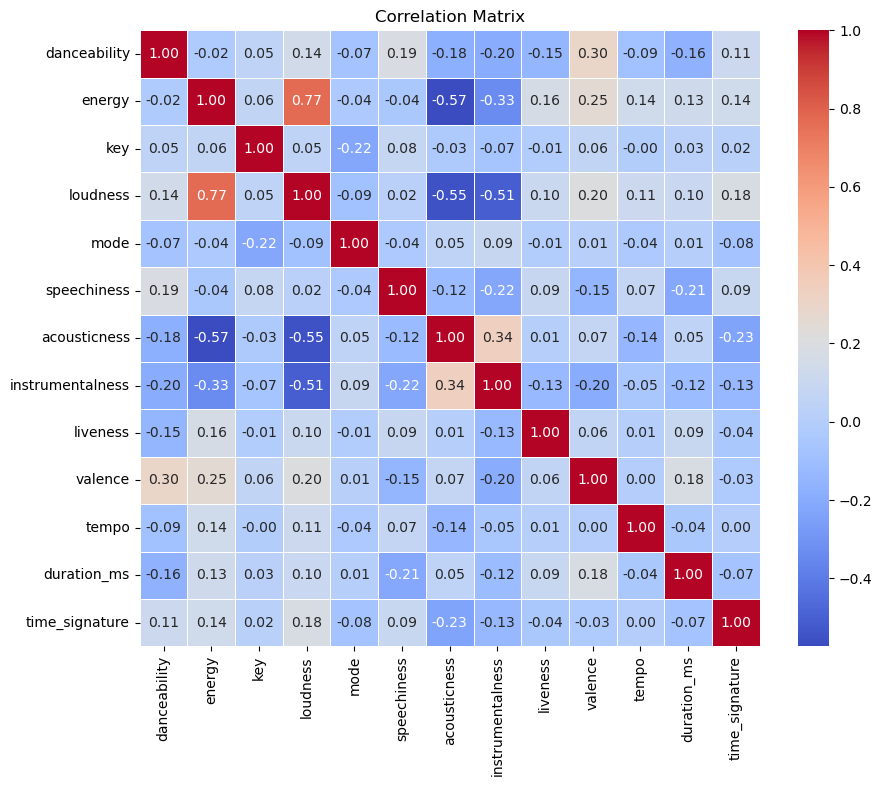

In [499]:
numeric_data = audio_features_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()